PANDAS GROUP BY: https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb


Info Links: https://code.visualstudio.com/docs/python/jupyter-support  
https://stackoverflow.com/questions/35226904/convert-spanish-date-in-string-format  
https://stackabuse.com/how-to-format-dates-in-python/  
Dateparser docs:https://dateparser.readthedocs.io/en/latest/  

Threads:https://stackoverflow.com/questions/34386561/pyqt-not-responding  
Thread and return:https://stackoverflow.com/questions/6893968/how-to-get-the-return-value-from-a-thread-in-python 


Tuto threads:http://www.laurentluce.com/posts/python-threads-synchronization-locks-rlocks-semaphores-conditions-events-and-queues/  
Threads PyQT5: https://stackoverflow.com/questions/42357656/pyqt5-timers-cannot-be-started-from-another-thread-error-when-changing-size-of


RESPUESTA FINAL: https://stackoverflow.com/questions/42357656/pyqt5-timers-cannot-be-started-from-another-thread-error-when-changing-size-of


Problema cierre de ventanas por que los recolecta pa basura: https://www.reddit.com/r/Python/comments/7cml65/pyqt_second_screen_closes_immediately/

PyQT COMPORTAMIENTO:https://doc.qt.io/archives/qt-4.8/qapplication.html#lastWindowClosed


## Imports the necessary libraries

In [166]:
import os
import pandas as pd
import numpy as np

In [2]:
# Gets all the files from the dir
baseDir = r"C:\\Users\\robin\\Google Drive\\WORK\\ExcelsStuff\\files\\nuevos"
fileNames = []
for filename in os.listdir(baseDir):
    if(filename.startswith('~$')):
        continue
    fileNames.append(filename)
fileNames

['Dic312019.xlsx', 'Ene022020.xlsx']

In [167]:
# Gets all the files from the dir
baseDir = r"C:\\Users\\robin\\Google Drive\\WORK\\ExcelsStuff\\files\\nuevos"
fileNames = []
for filename in os.listdir(baseDir):
    if(filename.startswith('~$')):
        continue
    fileNames.append(filename)
fileNames

['Lista Enero 12.xlsx',
 'Lista Enero 13.xlsx',
 'Lista Enero 14.xlsx',
 'Lista Enero 15.xlsx']

## Reads each excel file and saves all the sheets into a list with the specified columns

In [3]:

dfs = []
COLS = ["RAT","OPERATOR","CHANNEL","IMEI","IMSI","TMSI",
        "MS POWER","TA","LAST LAC","NAME","HITS","DATE-TIME"]
for filename in fileNames:
    # dfs.append(pd.read_excel(f"{baseDir}\\{filename}"))
    temd_dfs = [pd.read_excel(f"{baseDir}\\{filename}", sheet_name=0, usecols=COLS), #2G
                pd.read_excel(f"{baseDir}\\{filename}", sheet_name=1, usecols=COLS), #3G
                pd.read_excel(f"{baseDir}\\{filename}", sheet_name=2, usecols=COLS)] #4G
    dfs.append(temd_dfs)
len(dfs)

2

In [168]:
# NUEVO
dfs = []
COLS = ["RAT", "OPERATOR", "CHANNEL", "IMEI", "IMSI", "TMSI",
        "MS POWER", "TA", "LAST LAC", "NAME", "HITS", "DATE-TIME"]
for filePath in fileNames:
    temd_df = pd.read_excel(f"{baseDir}\\{filePath}", usecols=COLS)
    dfs.append(temd_df)
len(dfs)

4

In [169]:
allData = pd.concat(dfs)
allData.dropna(how='all', inplace=True)
allData.head()

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS POWER,TA,LAST LAC,NAME,HITS,DATE-TIME
0,2G,EC-Movistar(Telefónica)-00,245.0,2.040433e+14,356612024675599,1F41825D,-72,0,15251.0,NaN,2.0,do. ene. 12 17:06:33 2020
1,2G,EC-Movistar(Telefónica)-00,245.0,2.040808e+14,353068098714504,FFFFFFFF,-79,0,15251.0,NaN,1.0,do. ene. 12 16:26:39 2020
2,2G,EC-Claro(América Móvil)-01,136.0,2.140329e+14,357955087983593,700A80E9,-88,0,50134.0,NaN,1.0,do. ene. 12 18:54:47 2020
3,2G,EC-Movistar(Telefónica)-00,245.0,2.140366e+14,869328032037298,16231F0D,-77,0,15251.0,NaN,1.0,do. ene. 12 10:51:06 2020
4,2G,EC-Movistar(Telefónica)-00,245.0,2.140606e+14,358794102465313,FFFFFFFF,-83,0,65534.0,NaN,1.0,do. ene. 12 11:36:16 2020


In [170]:
allData.dropna(how='all', inplace=True)

In [171]:
allData

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS POWER,TA,LAST LAC,NAME,HITS,DATE-TIME
0,2G,EC-Movistar(Telefónica)-00,245.0,2.040433e+14,356612024675599,1F41825D,-72,0,15251.0,NaN,2.0,do. ene. 12 17:06:33 2020
1,2G,EC-Movistar(Telefónica)-00,245.0,2.040808e+14,353068098714504,FFFFFFFF,-79,0,15251.0,NaN,1.0,do. ene. 12 16:26:39 2020
2,2G,EC-Claro(América Móvil)-01,136.0,2.140329e+14,357955087983593,700A80E9,-88,0,50134.0,NaN,1.0,do. ene. 12 18:54:47 2020
3,2G,EC-Movistar(Telefónica)-00,245.0,2.140366e+14,869328032037298,16231F0D,-77,0,15251.0,NaN,1.0,do. ene. 12 10:51:06 2020
4,2G,EC-Movistar(Telefónica)-00,245.0,2.140606e+14,358794102465313,FFFFFFFF,-83,0,65534.0,NaN,1.0,do. ene. 12 11:36:16 2020
...,...,...,...,...,...,...,...,...,...,...,...,...
13910,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,8.67265e+14,8C6CB575,-71,0,15251.0,NaN,1.0,mi. ene. 15 07:20:28 2020
13911,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,8.65464e+14,87D32415,-76,0,15251.0,NaN,1.0,mi. ene. 15 07:20:27 2020
13912,2G,EC-Movistar(Telefónica)-00,245.0,7.400051e+14,8.63561e+14,8C5FC27D,-80,0,15251.0,NaN,1.0,mi. ene. 15 07:20:27 2020
13913,2G,EC-Movistar(Telefónica)-00,245.0,7.400102e+14,3.55216e+14,BE0DC509,-63,0,10228.0,NaN,1.0,mi. ene. 15 07:20:26 2020


In [57]:
dfs[0][0].head()

KeyError: 0

In [5]:
# The dfs[0] means the excel file at index 0 with the 3 pages as dataframes
len(dfs[0])
# The fisrt index is a list of dataframes that has everydataframe

3

In [6]:
len([df for dflist in dfs for df in dflist])

6

In [7]:
allData = pd.concat([df for dflist in dfs for df in dflist])
allData.info() # 3633-6 filas sin contar los headers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3627 entries, 0 to 73
Data columns (total 12 columns):
RAT          3627 non-null object
OPERATOR     3627 non-null object
CHANNEL      3627 non-null int64
IMSI         3524 non-null float64
IMEI         3528 non-null float64
TMSI         3528 non-null object
MS POWER     3627 non-null float64
TA           3627 non-null int64
LAST LAC     3627 non-null int64
NAME         0 non-null float64
HITS         3627 non-null int64
DATE-TIME    3627 non-null object
dtypes: float64(4), int64(4), object(4)
memory usage: 368.4+ KB


In [172]:
# Renaming columns
cols = allData.columns
cols = cols.map(lambda x: x.strip().replace(' ', '_').strip() if isinstance(x, (str, )) else x)
allData.columns = cols

In [173]:
allData.head()

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE-TIME
0,2G,EC-Movistar(Telefónica)-00,245.0,2.040433e+14,356612024675599,1F41825D,-72,0,15251.0,NaN,2.0,do. ene. 12 17:06:33 2020
1,2G,EC-Movistar(Telefónica)-00,245.0,2.040808e+14,353068098714504,FFFFFFFF,-79,0,15251.0,NaN,1.0,do. ene. 12 16:26:39 2020
2,2G,EC-Claro(América Móvil)-01,136.0,2.140329e+14,357955087983593,700A80E9,-88,0,50134.0,NaN,1.0,do. ene. 12 18:54:47 2020
3,2G,EC-Movistar(Telefónica)-00,245.0,2.140366e+14,869328032037298,16231F0D,-77,0,15251.0,NaN,1.0,do. ene. 12 10:51:06 2020
4,2G,EC-Movistar(Telefónica)-00,245.0,2.140606e+14,358794102465313,FFFFFFFF,-83,0,65534.0,NaN,1.0,do. ene. 12 11:36:16 2020


### Returns a datetime object from a string representation

In [61]:
allData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60527 entries, 0 to 26189
Data columns (total 12 columns):
RAT          42711 non-null object
OPERATOR     42711 non-null object
CHANNEL      42711 non-null float64
IMSI         42546 non-null float64
IMEI         40032 non-null object
TMSI         40035 non-null object
MS_POWER     42711 non-null object
TA           42711 non-null object
LAST_LAC     42711 non-null float64
NAME         3 non-null float64
HITS         42678 non-null float64
DATE-TIME    42708 non-null object
dtypes: float64(5), object(7)
memory usage: 7.3+ MB


In [174]:
def getMonthInt(strMonth):
    if(strMonth.lower() in ["ene"]):
        return 1
    elif(strMonth.lower() in ["feb"]):
        return 2
    elif(strMonth.lower() in ["mar"]):
        return 3
    elif(strMonth.lower() in ["abr"]):
        return 4
    elif(strMonth.lower() in ["may"]):
        return 5
    elif(strMonth.lower() in ["jun"]):
        return 6
    elif(strMonth.lower() in ["jul"]):
        return 7
    elif(strMonth.lower() in ["ago"]):
        return 8
    elif(strMonth.lower() in ["sep"]):
        return 9
    elif(strMonth.lower() in ["oct"]):
        return 10
    elif(strMonth.lower() in ["nov"]):
        return 11
    elif(strMonth.lower() in ["dic"]):
        return 12

def toDatetime(dateStr):
    if isinstance(dateStr, str):
        # Date string example-> ma. dic. 31 23:50:11 2019
        _, month,t_year = list(map(str.strip, dateStr.split('.')))
        day, t, year = t_year.split(' ') 
        month = getMonthInt(month)
        dateStr = f"{year}-{month}-{day} {t}"
        return pd.to_datetime(dateStr, format="%Y-%m-%d %X")
    else:
        return dateStr
result = toDatetime("lu. ene. 13 13:12:52 2020")
print(result)
type(result)

2020-01-13 13:12:52


pandas._libs.tslibs.timestamps.Timestamp

In [175]:
allData.head(2)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE-TIME
0,2G,EC-Movistar(Telefónica)-00,245.0,2.040433e+14,356612024675599,1F41825D,-72,0,15251.0,NaN,2.0,do. ene. 12 17:06:33 2020
1,2G,EC-Movistar(Telefónica)-00,245.0,2.040808e+14,353068098714504,FFFFFFFF,-79,0,15251.0,NaN,1.0,do. ene. 12 16:26:39 2020


In [176]:
allData['DATE_TIME'] = allData['DATE-TIME'].apply(toDatetime)
allData.head(2)
allData.drop('DATE-TIME', axis=1, inplace=True)
allData

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
0,2G,EC-Movistar(Telefónica)-00,245.0,2.040433e+14,356612024675599,1F41825D,-72,0,15251.0,NaN,2.0,2020-01-12 17:06:33
1,2G,EC-Movistar(Telefónica)-00,245.0,2.040808e+14,353068098714504,FFFFFFFF,-79,0,15251.0,NaN,1.0,2020-01-12 16:26:39
2,2G,EC-Claro(América Móvil)-01,136.0,2.140329e+14,357955087983593,700A80E9,-88,0,50134.0,NaN,1.0,2020-01-12 18:54:47
3,2G,EC-Movistar(Telefónica)-00,245.0,2.140366e+14,869328032037298,16231F0D,-77,0,15251.0,NaN,1.0,2020-01-12 10:51:06
4,2G,EC-Movistar(Telefónica)-00,245.0,2.140606e+14,358794102465313,FFFFFFFF,-83,0,65534.0,NaN,1.0,2020-01-12 11:36:16
...,...,...,...,...,...,...,...,...,...,...,...,...
13910,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,8.67265e+14,8C6CB575,-71,0,15251.0,NaN,1.0,2020-01-15 07:20:28
13911,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,8.65464e+14,87D32415,-76,0,15251.0,NaN,1.0,2020-01-15 07:20:27
13912,2G,EC-Movistar(Telefónica)-00,245.0,7.400051e+14,8.63561e+14,8C5FC27D,-80,0,15251.0,NaN,1.0,2020-01-15 07:20:27
13913,2G,EC-Movistar(Telefónica)-00,245.0,7.400102e+14,3.55216e+14,BE0DC509,-63,0,10228.0,NaN,1.0,2020-01-15 07:20:26


In [12]:
# allData['DATE'] = pd.to_datetime(allData['DATE-TIME'], format="%Y-%m-%d").dt.date
# allData['TIME'] = pd.to_datetime(allData['DATE-TIME']).dt.time
# allData.sort_values(by=["DATE"], inplace=True, ascending=True)

In [13]:
# allData.drop('DATE-TIME', axis=1, inplace=True)

In [14]:
allData.head(2)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
0,2G,EC-Claro(América Móvil)-01,144,7.400202e+14,3.594591e+14,FFFFFFFF,-61.0,0,65534,NaN,1,2020-01-01 03:05:16
1,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.578151e+14,FFFFFFFF,-62.0,0,65534,NaN,1,2020-01-01 03:04:51


In [15]:
allData.groupby('RAT').count()

,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
RAT,,,,,,,,,,,
2G,1457,1457,1456,1457,1457,1457,1457,1457,0,1457,1457
3G,2071,2071,1969,2071,2071,2071,2071,2071,0,2071,2071
4G,99,99,99,0,0,99,99,99,0,99,99


In [16]:
allData.groupby('IMEI').count()

,RAT,OPERATOR,CHANNEL,IMSI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
IMEI,,,,,,,,,,,
1.037300e+13,1,1,1,1,1,1,1,1,0,1,1
1.099701e+13,1,1,1,1,1,1,1,1,0,1,1
1.122300e+13,1,1,1,1,1,1,1,1,0,1,1
1.138700e+13,1,1,1,1,1,1,1,1,0,1,1
1.138800e+13,1,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8.699710e+14,2,2,2,2,2,2,2,2,0,2,2
8.699710e+14,3,3,3,2,3,3,3,3,0,3,3
8.699710e+14,1,1,1,1,1,1,1,1,0,1,1


In [17]:
allData.groupby('IMEI').count()['IMSI']

IMEI
1.037300e+13    1
1.099701e+13    1
1.122300e+13    1
1.138700e+13    1
1.138800e+13    1
               ..
8.699710e+14    2
8.699710e+14    2
8.699710e+14    1
8.699720e+14    1
9.900058e+14    1
Name: IMSI, Length: 2260, dtype: int64

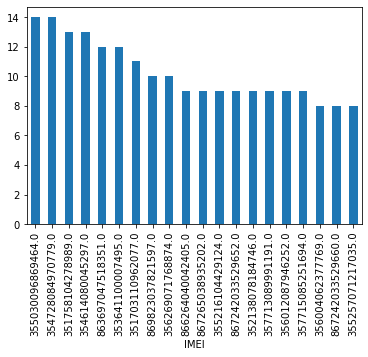

In [29]:
allData.groupby('IMEI').count()['IMSI'].sort_values(ascending=False).head(20).plot.bar()

In [19]:
def tiempoAvanceFilter(df, valuesList):
    """ Filters the df by the values on the TA column"""
    return df[df['TA'].isin(valuesList)]
tiempoAvanceFilter(allData, [1,2,3,4,5,6])

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
0,3G,EC-Claro(América Móvil)-01,587,7.400102e+14,3.546121e+14,F44BDA78,-93.0,3,50134,NaN,1,2020-01-01 01:41:41
1,3G,EC-Claro(América Móvil)-01,587,7.400102e+14,3.587931e+14,F044798E,-94.0,3,50134,NaN,1,2020-01-01 00:39:43
2,3G,EC-Claro(América Móvil)-01,587,7.400102e+14,3.526611e+14,F54AD920,-92.0,3,50134,NaN,1,2020-01-01 00:30:59
3,3G,EC-Claro(América Móvil)-01,587,7.400102e+14,3.537711e+14,F041E2C0,-98.0,3,32769,NaN,3,2020-01-01 01:42:15
4,3G,EC-Claro(América Móvil)-01,587,7.400102e+14,3.571401e+14,C5433C71,-92.0,3,50134,NaN,1,2020-01-01 00:24:49
...,...,...,...,...,...,...,...,...,...,...,...,...
69,4G,EC-Movistar(Telefónica)-00,700,7.400002e+14,NaN,NaN,-104757.0,2,-1,NaN,11,2020-01-02 13:48:39
70,4G,EC-Movistar(Telefónica)-00,700,7.400001e+14,NaN,NaN,-116319.0,2,9616,NaN,1,2020-01-02 10:05:15
71,4G,EC-Movistar(Telefónica)-00,700,7.400001e+14,NaN,NaN,-110616.0,2,9616,NaN,3,2020-01-02 13:49:10
72,4G,EC-Movistar(Telefónica)-00,700,7.400001e+14,NaN,NaN,-104366.0,2,9616,NaN,1,2020-01-02 10:04:13


In [0]:
def msPowerRangeFilter(df, fromN, toN):
    """ Filters the df in the column MS POWER with the given boundaries"""
    return df[df['MS POWER'].between(fromN, toN)]
msPower(allData, -100, 60)

In [0]:
def lastLacRangeFilter(df, fromN, toN):
    """ Filters the df in the column LAST LAC within the given boundaries"""
    return df[df['LAST LAC'].between(fromN, toN)]
lastLac(allData, -100, 60000)

In [0]:
def getHitsAmounForEmais(df, n=None):
    """ Gets the frecuency of each IMEI in the df and returns a n length series"""
    # return df.groupby('IMEI')['HITS'].sum().sort_values(ascending=False).head(n=n)
    return df.groupby('IMEI')['HITS'].transform(
        lambda x: sum(x)
    )
getFrecuencyForEmais(allData)

In [78]:
import hashlib

def getUniqueNameIdColumn(df: pd.DataFrame):
    """ Updates the NAME with a unique KEY FOR A imei group"""
    fn = lambda x: hashlib.md5(str(x).encode()).hexdigest()
    return df.groupby('IMEI')['IMEI'].transform(fn)
# Como asignarlo para que no de warning y SI lo pegue 
# df = df.assign(c=col.values) # assign values to column 'c'
df1 = getUniqueNameIdColumn(allData.loc[allData['IMEI'].notnull()])
df = allData.loc[allData['IMEI'].notnull()]
df.assign(test = df1)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME,test
0,2G,EC-Claro(América Móvil)-01,144,7.400202e+14,3.594591e+14,FFFFFFFF,-61.0,0,65534,NaN,1,2020-01-01 03:05:16,f2c32df94581d7c7ad60fd4d581b4531
1,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.578151e+14,FFFFFFFF,-62.0,0,65534,NaN,1,2020-01-01 03:04:51,2af54eb33eb0049a80f82ee93826cee0
2,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,8.636970e+14,151D1A53,-66.0,0,50134,NaN,1,2020-01-01 02:55:06,634f626b4d8d9122684165bac3b2dc16
3,2G,EC-Claro(América Móvil)-01,144,7.400101e+14,3.570841e+14,97155956,-62.0,0,10228,NaN,1,2020-01-01 02:54:44,24c7f4fe956e54719b3deea7ff7878ba
4,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.580991e+14,FFFFFFFF,-64.0,0,65534,NaN,1,2020-01-01 02:37:15,332c8325cdd994425399b26ed08a2561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,3G,EC-Movistar(Telefónica)-00,537,7.400001e+14,8.658420e+14,D51AC792,-102.0,2,15251,NaN,1,2020-01-02 10:04:21,4112d868c0e36bb5be4587c83d651260
977,3G,EC-Movistar(Telefónica)-00,4412,7.400051e+14,3.517041e+14,2AAC703D,-98.0,3,15251,NaN,3,2020-01-02 11:43:21,ed705ff8f2facf9f5b46afff6fc8e2bb
978,3G,EC-Movistar(Telefónica)-00,537,7.400102e+14,3.562691e+14,FE4571E7,-104.0,3,50134,NaN,1,2020-01-02 10:04:17,ceba4ffad4a2a0af7e3ac4ac3209993e
979,3G,EC-Movistar(Telefónica)-00,4412,7.400001e+14,8.636970e+14,0,-100.0,3,40202,NaN,2,2020-01-02 13:21:07,fc49fed725f3c318207562df44b9ae10


In [73]:
df

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
0,2G,EC-Claro(América Móvil)-01,144,7.400202e+14,3.594591e+14,FFFFFFFF,-61.0,0,65534,NaN,1,2020-01-01 03:05:16
1,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.578151e+14,FFFFFFFF,-62.0,0,65534,NaN,1,2020-01-01 03:04:51
2,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,8.636970e+14,151D1A53,-66.0,0,50134,NaN,1,2020-01-01 02:55:06
3,2G,EC-Claro(América Móvil)-01,144,7.400101e+14,3.570841e+14,97155956,-62.0,0,10228,NaN,1,2020-01-01 02:54:44
4,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.580991e+14,FFFFFFFF,-64.0,0,65534,NaN,1,2020-01-01 02:37:15
...,...,...,...,...,...,...,...,...,...,...,...,...
976,3G,EC-Movistar(Telefónica)-00,537,7.400001e+14,8.658420e+14,D51AC792,-102.0,2,15251,NaN,1,2020-01-02 10:04:21
977,3G,EC-Movistar(Telefónica)-00,4412,7.400051e+14,3.517041e+14,2AAC703D,-98.0,3,15251,NaN,3,2020-01-02 11:43:21
978,3G,EC-Movistar(Telefónica)-00,537,7.400102e+14,3.562691e+14,FE4571E7,-104.0,3,50134,NaN,1,2020-01-02 10:04:17
979,3G,EC-Movistar(Telefónica)-00,4412,7.400001e+14,8.636970e+14,0,-100.0,3,40202,NaN,2,2020-01-02 13:21:07


In [83]:
# Inplace replacement
import hashlib

def getUniqueNameIdColumn(dfEmaisOk: pd.DataFrame):
    """ Updates the NAME with a unique KEY for a EMAI groups and returns that new DataFrame"""
    fn = lambda x: hashlib.md5(str(x).encode()).hexdigest()[0:10]
    df1 = dfEmaisOk.groupby('IMEI')['IMEI'].transform(fn)
    return dfEmaisOk.assign(NAME=df1)
# Como asignarlo para que no de warning y SI lo pegue 
# df = df.assign(c=col.values) # assign values to column 'c'
df1 = getUniqueNameIdColumn(allData.loc[allData['IMEI'].notnull()])
df1

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
0,2G,EC-Claro(América Móvil)-01,144,7.400202e+14,3.594591e+14,FFFFFFFF,-61.0,0,65534,f2c32df945,1,2020-01-01 03:05:16
1,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.578151e+14,FFFFFFFF,-62.0,0,65534,2af54eb33e,1,2020-01-01 03:04:51
2,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,8.636970e+14,151D1A53,-66.0,0,50134,634f626b4d,1,2020-01-01 02:55:06
3,2G,EC-Claro(América Móvil)-01,144,7.400101e+14,3.570841e+14,97155956,-62.0,0,10228,24c7f4fe95,1,2020-01-01 02:54:44
4,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.580991e+14,FFFFFFFF,-64.0,0,65534,332c8325cd,1,2020-01-01 02:37:15
...,...,...,...,...,...,...,...,...,...,...,...,...
976,3G,EC-Movistar(Telefónica)-00,537,7.400001e+14,8.658420e+14,D51AC792,-102.0,2,15251,4112d868c0,1,2020-01-02 10:04:21
977,3G,EC-Movistar(Telefónica)-00,4412,7.400051e+14,3.517041e+14,2AAC703D,-98.0,3,15251,ed705ff8f2,3,2020-01-02 11:43:21
978,3G,EC-Movistar(Telefónica)-00,537,7.400102e+14,3.562691e+14,FE4571E7,-104.0,3,50134,ceba4ffad4,1,2020-01-02 10:04:17
979,3G,EC-Movistar(Telefónica)-00,4412,7.400001e+14,8.636970e+14,0,-100.0,3,40202,fc49fed725,2,2020-01-02 13:21:07


In [43]:
def filterByRat(df, rats = []):
    """ Returns a df with the seleccted rats """
    groupedRats = df.groupby('RAT')
    ratDfs = [groupedRats.get_group(gn) for gn in rats]
    return pd.concat(ratDfs)
filterByRat(allData, ["3G"])

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE,TIME
724,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,8.612500e+14,BA129B0E,-94.0,3,50134,NaN,1,2019-12-31,15:24:18
292,3G,EC-Claro(América Móvil)-01,4387,7.400002e+14,3.517591e+14,A4C47315,-95.0,3,15251,NaN,1,2019-12-31,16:59:42
291,3G,EC-Claro(América Móvil)-01,587,7.400002e+14,3.517591e+14,A4C47315,-105.0,3,15251,NaN,1,2019-12-31,17:00:04
290,3G,EC-Claro(América Móvil)-01,587,7.400102e+14,3.557471e+14,FC483124,-66.0,3,50134,NaN,1,2019-12-31,17:00:40
289,3G,EC-Claro(América Móvil)-01,4387,7.400102e+14,8.648850e+14,DA430032,-43.0,3,50134,NaN,1,2019-12-31,17:00:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,3G,EC-Movistar(Telefónica)-00,512,7.400001e+14,3.526861e+14,EA026FB9,-109.0,3,32768,NaN,3,2020-01-03,00:19:34
52,3G,EC-Claro(América Móvil)-01,612,7.400102e+14,3.546141e+14,CF40806C,-95.0,3,50404,NaN,5,2020-01-03,00:04:58
660,3G,EC-Movistar(Telefónica)-00,512,7.400002e+14,8.698230e+14,C51AD745,-108.0,2,32768,NaN,3,2020-01-03,00:26:59
41,3G,EC-Claro(América Móvil)-01,612,7.400102e+14,8.698230e+14,DA434B7C,-92.0,3,32769,NaN,6,2020-01-03,00:07:18


In [45]:
def filterDfByColumnValues(df, column: str, columnValues: list):
    """
    Groups the df by the column parameters and gets the groups in the columnValues list
    """
    groupedColumn = df.groupby(column)
    dfs = [groupedColumn.get_group(gn) for gn in columnValues]
    return pd.concat(dfs)

In [0]:
allData['IMEI'].count()

In [27]:
allData.head(2)
allData.drop('DATE-TIME', axis=1,inplace=True)

In [28]:
headerList = tuple(allData.columns.values)
headerList

('RAT',
 'OPERATOR',
 'CHANNEL',
 'IMSI',
 'IMEI',
 'TMSI',
 'MS_POWER',
 'TA',
 'LAST_LAC',
 'NAME',
 'HITS',
 'DATE_TIME')

In [29]:

for i,row in enumerate(allData.itertuples()):
    print("Raw raow ",row)
    r = []
    for i,columnName in enumerate(headerList):
        r.append(row._asdict()[str(columnName)])
    print(r)
    print("------------------------------------------------------------------------------\n\n")

, 1, Timestamp('2020-01-02 13:53:04')]
------------------------------------------------------------------------------


Raw raow  Pandas(Index=30, RAT='4G', OPERATOR='EC-Claro(América Móvil)-01', CHANNEL=925, IMSI=740010173847666.0, IMEI=nan, TMSI=nan, MS_POWER=-102.96, TA=2, LAST_LAC=60134, NAME=nan, HITS=1, DATE_TIME=Timestamp('2020-01-02 13:52:59'))
['4G', 'EC-Claro(América Móvil)-01', 925, 740010173847666.0, nan, nan, -102.96, 2, 60134, nan, 1, Timestamp('2020-01-02 13:52:59')]
------------------------------------------------------------------------------


Raw raow  Pandas(Index=31, RAT='4G', OPERATOR='EC-Claro(América Móvil)-01', CHANNEL=925, IMSI=740010178573355.0, IMEI=nan, TMSI=nan, MS_POWER=-101319.0, TA=2, LAST_LAC=-1, NAME=nan, HITS=34, DATE_TIME=Timestamp('2020-01-02 16:35:21'))
['4G', 'EC-Claro(América Móvil)-01', 925, 740010178573355.0, nan, nan, -101319.0, 2, -1, nan, 34, Timestamp('2020-01-02 16:35:21')]
-----------------------------------------------------------------

In [35]:
list(allData.columns.values)

['RAT',
 'OPERATOR',
 'CHANNEL',
 'IMSI',
 'IMEI',
 'TMSI',
 'MS POWER',
 'TA',
 'LAST LAC',
 'NAME',
 'HITS',
 'DATE',
 'TIME']

In [145]:
# Prueba
import numpy as np
pivotTable = pd.pivot_table(allData, values="HITS", index=['IMEI', 'IMSI'], aggfunc=np.sum)
pivotTable

HITS
IMEI         IMSI              
1.037300e+13 7.400102e+14     1
1.099701e+13 7.400101e+14     1
1.122300e+13 7.400102e+14     1
1.138700e+13 7.400101e+14     1
1.138800e+13 7.400101e+14     1
1.167201e+13 7.400102e+14     1
             7.400202e+14     1
1.176901e+13 7.400102e+14     1
1.185101e+13 7.400101e+14     1
1.196900e+13 7.400002e+14     1
1.201701e+13 7.400202e+14     1
1.240101e+13 7.400102e+14     1
1.245600e+13 7.400102e+14     1
1.245601e+13 7.400101e+14     1
1.250400e+13 7.400202e+14     1
1.282101e+13 7.400102e+14     1
1.285901e+13 7.400102e+14     1
1.323600e+13 7.400102e+14     1
1.334400e+13 7.400102e+14     1
1.340100e+13 7.400102e+14     1
1.353701e+13 7.400102e+14     1
1.385201e+13 7.400102e+14     1
1.396101e+13 7.400052e+14     2
             7.400102e+14     1
             7.400102e+14     1
             7.400101e+14     2
             7.400101e+14     2
             7.400202e+14     1
             7.400052e+14     1
             7.400102e+14     1
...                         ...
8.691700e+14 7.400202e+14     1
8.692310e+14 7.400101e+14     1
8.693960e+14 7.400001e+14     1
             7.400102e+14     6
             7.400102e+14     1
             7.400001e+14     1
8.694280e+14 7.400102e+14    24
8.694560e+14 7.400052e+14     1
8.696220e+14 7.400102e+14     1
8.697940e+14 7.400001e+14     1
8.698100e+14 7.400102e+14     1
8.698230e+14 7.400202e+14     2
             7.400102e+14     2
             7.400102e+14     1
             7.400102e+14    19
             7.400052e+14     1
             7.400002e+14    15
             7.400002e+14    38
             7.400001e+14    11
8.698240e+14 7.400052e+14     3
             7.400001e+14     1
8.699690e+14 7.400001e+14     1
             7.400001e+14     1
8.699710e+14 7.400102e+14    10
             7.400102e+14     5
             7.400102e+14     3
             7.400102e+14     3
             7.400102e+14     1
8.699720e+14 7.400051e+14     4
9.900058e+14 7.400052e+14     1

[2263 rows x 1 columns]

In [93]:
allData.head(2)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE-TIME
0,2G,EC-Movistar(Telefónica)-00,245.0,2.040433e+14,356612024675599,1F41825D,-72,0,15251.0,NaN,2.0,do. ene. 12 17:06:33 2020
1,2G,EC-Movistar(Telefónica)-00,245.0,2.040808e+14,353068098714504,FFFFFFFF,-79,0,15251.0,NaN,1.0,do. ene. 12 16:26:39 2020


In [177]:
def getDatosIncidentales(df, hitMin):
    groupedDfHitsMin = df.groupby('IMEI').filter(lambda x: x['HITS'].sum()<=hitMin)
    # print("Agrupados por hits igual a 1\n ", groupedDfHitsMin)
    groupedDfNullValues = df[df['DATE_TIME'].isnull() | df['HITS'].isnull()]
    # print("Agrupados por nulos\n", groupedDfNullValues)
    incidentales = pd.concat([groupedDfHitsMin, groupedDfNullValues])
    # Sin IMEI ni IMSI
    return incidentales
getDatosIncidentales(allData, 1)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
3,2G,EC-Movistar(Telefónica)-00,245.0,2.140366e+14,869328032037298,16231F0D,-77,0,15251.0,NaN,1.0,2020-01-12 10:51:06
6,2G,EC-Movistar(Telefónica)-00,245.0,2.140743e+14,861359031387309,2FE8CD75,-77,0,15251.0,NaN,1.0,2020-01-12 17:44:39
7,2G,EC-Movistar(Telefónica)-00,245.0,2.140743e+14,358222059041713,12D239D5,-77,0,15251.0,NaN,1.0,2020-01-12 11:57:54
10,2G,EC-Movistar(Telefónica)-00,245.0,2.140755e+14,864763044172979,2FA53275,0,0,40202.0,NaN,1.0,2020-01-12 17:25:06
11,2G,EC-Movistar(Telefónica)-00,245.0,2.280235e+14,357075086070209,2E9361FD,-1,0,40202.0,NaN,1.0,2020-01-12 17:35:51
...,...,...,...,...,...,...,...,...,...,...,...,...
11159,3G,EC-Claro(América Móvil)-01,4387.0,7.400102e+14,7.4e+14,867265034842717,9AECB985,-98,4.0,NaN,NaN,1
11160,3G,EC-Claro(América Móvil)-01,587.0,7.400102e+14,3.58168e+14,358169074009466,FF4D61C7,-100,4.0,NaN,NaN,1
11161,3G,EC-Claro(América Móvil)-01,4387.0,7.400102e+14,3.56302e+14,353763083006946,D84923CA,-58,4.0,NaN,NaN,1
11162,3G,EC-Claro(América Móvil)-01,4387.0,7.400102e+14,3.52625e+14,352624094864676,E94B9A28,-100,5.0,NaN,NaN,1


In [178]:
# Respuesta https://stackoverflow.com/questions/48647534/python-pandas-find-difference-between-two-data-frames
def getDifferenceBetweenDataFrames(dfLeft: pd.DataFrame, dfRight: pd.DataFrame):
    dfRes = dfLeft.merge(dfRight, indicator = True, how='left').loc[lambda x : x['_merge']!='both']
    dfRes.drop(columns=['_merge'], inplace=True)
    return dfRes
allData = getDifferenceBetweenDataFrames(allData, getDatosIncidentales(allData, 1))

In [179]:
allData

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
0,2G,EC-Movistar(Telefónica)-00,245.0,2.040433e+14,356612024675599,1F41825D,-72,0,15251.0,NaN,2.0,2020-01-12 17:06:33
1,2G,EC-Movistar(Telefónica)-00,245.0,2.040808e+14,353068098714504,FFFFFFFF,-79,0,15251.0,NaN,1.0,2020-01-12 16:26:39
2,2G,EC-Claro(América Móvil)-01,136.0,2.140329e+14,357955087983593,700A80E9,-88,0,50134.0,NaN,1.0,2020-01-12 18:54:47
4,2G,EC-Movistar(Telefónica)-00,245.0,2.140606e+14,358794102465313,FFFFFFFF,-83,0,65534.0,NaN,1.0,2020-01-12 11:36:16
5,2G,EC-Movistar(Telefónica)-00,245.0,2.140742e+14,868789022187230,FFFFFFFF,-64,0,65534.0,NaN,24.0,2020-01-12 16:34:41
...,...,...,...,...,...,...,...,...,...,...,...,...
42729,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,8.67265e+14,8C6CB575,-71,0,15251.0,NaN,1.0,2020-01-15 07:20:28
42730,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,8.65464e+14,87D32415,-76,0,15251.0,NaN,1.0,2020-01-15 07:20:27
42731,2G,EC-Movistar(Telefónica)-00,245.0,7.400051e+14,8.63561e+14,8C5FC27D,-80,0,15251.0,NaN,1.0,2020-01-15 07:20:27
42732,2G,EC-Movistar(Telefónica)-00,245.0,7.400102e+14,3.55216e+14,BE0DC509,-63,0,10228.0,NaN,1.0,2020-01-15 07:20:26


In [127]:
def obtenerHitsEmai(df):
    return  df.groupby('IMEI')['HITS'].agg({'HITS': ('sum')})
obtenerHitsEmai(allData)

C:\Users\robin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


,HITS
IMEI,
1.037300e+13,3.0
1.065700e+13,3.0
1.071300e+13,33.0
1.071300e+13,2.0
1.071300e+13,24.0
...,...
9.900050e+14,2.0
9.900068e+14,2.0
9.900068e+14,2.0


In [31]:
def getUniqueColumnValues(df, column):
    return df[column].unique()
getUniqueColumnValues(allData,'OPERATOR').tolist()

['EC-Claro(América Móvil)-01', 'EC-Movistar(Telefónica)-00']

In [34]:
allData.head(1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 724 to 724
Data columns (total 13 columns):
RAT         1 non-null object
OPERATOR    1 non-null object
CHANNEL     1 non-null int64
IMSI        1 non-null float64
IMEI        1 non-null float64
TMSI        1 non-null object
MS_POWER    1 non-null float64
TA          1 non-null int64
LAST_LAC    1 non-null int64
NAME        0 non-null float64
HITS        1 non-null int64
DATE        1 non-null object
TIME        1 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 112.0+ bytes


In [35]:
def filterDfByEmai(df, imei):
    return df[df['IMEI']==imei]
filterDfByEmai(allData, 868789022187230)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE,TIME
294,2G,EC-Movistar(Telefónica)-00,245,2.140742e+14,8.687890e+14,FFFFFFFF,-65.0,0,15251,NaN,2,2020-01-02,12:33:35
5,2G,EC-Claro(América Móvil)-01,136,7.400102e+14,8.687890e+14,540C8DA9,-65.0,0,50134,NaN,1,2020-01-02,23:19:17
4,2G,EC-Claro(América Móvil)-01,136,7.400102e+14,8.687890e+14,870C5759,-66.0,0,10228,NaN,1,2020-01-02,23:20:18
3,2G,EC-Claro(América Móvil)-01,136,7.400102e+14,8.687890e+14,301038EE,-66.0,0,10228,NaN,1,2020-01-02,23:27:23
2,2G,EC-Claro(América Móvil)-01,136,7.400102e+14,8.687890e+14,9B0D58C1,-65.0,0,10228,NaN,1,2020-01-02,23:41:19
1,2G,EC-Claro(América Móvil)-01,136,7.400102e+14,8.687890e+14,36129C46,-64.0,0,10228,NaN,1,2020-01-02,23:47:29
0,2G,EC-Claro(América Móvil)-01,136,2.140742e+14,8.687890e+14,FFFFFFFF,-64.0,0,65534,NaN,1,2020-01-02,23:53:29


In [147]:
def getDfImeisNulos(df:pd.DataFrame):
    return df[df['IMEI'].isnull()]

In [148]:
# NO 
def asignarEmais(refDf: pd.DataFrame, dfToAssign: pd.DataFrame):
    """ Assigns Emais for the columns where the emais is null based on the historical data"""
    def obtenerEmai(groupDf):
        rCoincide = refDf[refDf['IMSI'].isin(groupDf['IMSI'].unique())]
        return rCoincide[['IMEI','IMSI']]
    return dfToAssign.groupby('IMSI').apply(obtenerEmai)
asignarEmais(allData, getDfImeisNulos(allData))

IMEI          IMSI
IMSI                                         
2.140198e+14 22552          NaN  2.140198e+14
2.620221e+14 29255          NaN  2.620221e+14
3.101202e+14 22553          NaN  3.101202e+14
7.140422e+14 29276          NaN  7.140422e+14
7.160608e+14 10497  3.53109e+14  7.160608e+14
...                         ...           ...
7.400202e+14 29099          NaN  7.400202e+14
             10721  3.53324e+14  7.400202e+14
             10722  3.53324e+14  7.400202e+14
             10723  3.53324e+14  7.400202e+14
             23543          NaN  7.400202e+14

[7344 rows x 2 columns]

In [149]:
getDfImeisNulos(allData)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
4640,3G,EC-Movistar(Telefónica)-00,512.0,7.400052e+14,NaN,D7309849,-104,3,32768.0,NaN,1.0,2020-01-12 13:01:37
7353,4G,EC-Movistar(Telefónica)-00,700.0,7.400001e+14,NaN,NaN,-116553,5,9616.0,NaN,3.0,2020-01-12 10:32:52
7354,4G,EC-Movistar(Telefónica)-00,700.0,7.400001e+14,NaN,NaN,-103819,4,9616.0,NaN,1.0,2020-01-12 10:32:06
7355,4G,EC-Movistar(Telefónica)-00,700.0,7.400001e+14,NaN,NaN,-114.6,4,9616.0,NaN,2.0,2020-01-12 10:32:35
7356,4G,EC-Movistar(Telefónica)-00,700.0,7.400001e+14,NaN,NaN,-112647,5,9616.0,NaN,1.0,2020-01-12 10:32:49
...,...,...,...,...,...,...,...,...,...,...,...,...
29788,4G,EC-Movistar(Telefónica)-00,700.0,7.400002e+14,NaN,NaN,-116632,7,9616.0,NaN,1.0,2020-01-15 07:23:01
29789,4G,EC-Movistar(Telefónica)-00,700.0,7.400051e+14,NaN,NaN,-109991,5,-1.0,NaN,1.0,2020-01-15 07:22:51
29790,4G,EC-Movistar(Telefónica)-00,700.0,7.400001e+14,NaN,NaN,-103272,4,9616.0,NaN,1.0,2020-01-15 07:22:40
29791,4G,EC-Movistar(Telefónica)-00,700.0,7.400002e+14,NaN,NaN,-103.35,4,9616.0,NaN,1.0,2020-01-15 07:22:30


In [165]:
def asignarEmais(allDataP: pd.DataFrame, dfImeisFaltantes: pd.DataFrame):
    """ Assigns Emais for the columns where the emais is null based on the historical data"""
    def joinValues(values):
        # print(f"{type(values)}")
        return ','.join(map(str,values))
    def obtenerEmai(x: str):
        # X is the IMSI value
        rCoincide = allDataP[allDataP['IMSI'].isin(x.values)]['IMEI']
        imeis = joinValues(rCoincide[rCoincide.notnull()].unique())
        return imeis
    nuevosValores = dfImeisFaltantes.groupby('IMSI')['IMSI'].transform(obtenerEmai)
    allDataP.loc[dfFalta.index, 'IMEI'] = nuevosValores
    return allDataP
dfFalta = getDfImeisNulos(allData)
# dfFalta = dfFalta.assign(IMEI = asignarEmais(allData, dfFalta))
asignarEmais(allData, dfFalta)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
0,2G,EC-Movistar(Telefónica)-00,245.0,2.040433e+14,356612024675599,1F41825D,-72,0,15251.0,NaN,2.0,2020-01-12 17:06:33
1,2G,EC-Movistar(Telefónica)-00,245.0,2.040808e+14,353068098714504,FFFFFFFF,-79,0,15251.0,NaN,1.0,2020-01-12 16:26:39
2,2G,EC-Claro(América Móvil)-01,136.0,2.140329e+14,357955087983593,700A80E9,-88,0,50134.0,NaN,1.0,2020-01-12 18:54:47
4,2G,EC-Movistar(Telefónica)-00,245.0,2.140606e+14,358794102465313,FFFFFFFF,-83,0,65534.0,NaN,1.0,2020-01-12 11:36:16
5,2G,EC-Movistar(Telefónica)-00,245.0,2.140742e+14,868789022187230,FFFFFFFF,-64,0,65534.0,NaN,24.0,2020-01-12 16:34:41
...,...,...,...,...,...,...,...,...,...,...,...,...
42707,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,8.67265e+14,8C6CB575,-71,0,15251.0,NaN,1.0,2020-01-15 07:20:28
42708,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,8.65464e+14,87D32415,-76,0,15251.0,NaN,1.0,2020-01-15 07:20:27
42709,2G,EC-Movistar(Telefónica)-00,245.0,7.400051e+14,8.63561e+14,8C5FC27D,-80,0,15251.0,NaN,1.0,2020-01-15 07:20:27
42710,2G,EC-Movistar(Telefónica)-00,245.0,7.400102e+14,3.55216e+14,BE0DC509,-63,0,10228.0,NaN,1.0,2020-01-15 07:20:26


In [163]:
allData[allData['IMEI'].isnull()]

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME


In [ ]:
# Ref
import hashlib

def getUniqueNameIdColumn(dfEmaisOk: pd.DataFrame):
    """ Updates the NAME with a unique KEY for a EMAI groups and returns that new DataFrame"""
    fn = lambda x: hashlib.md5(str(x).encode()).hexdigest()[0:10]
    df1 = dfEmaisOk.groupby('IMEI')['IMEI'].transform(fn)
    return dfEmaisOk.assign(NAME=df1)
# Como asignarlo para que no de warning y SI lo pegue 
# df = df.assign(c=col.values) # assign values to column 'c'
df1 = getUniqueNameIdColumn(allData.loc[allData['IMEI'].notnull()])
df1

In [33]:
allData.head(2)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE-TIME
0,2G,EC-Claro(América Móvil)-01,144,7.400202e+14,3.594591e+14,FFFFFFFF,-61.0,0,65534,NaN,1,2020-01-01 03:05:16
1,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.578151e+14,FFFFFFFF,-62.0,0,65534,NaN,1,2020-01-01 03:04:51


In [42]:
def getGroupedByEmais(df: pd.DataFrame):
    # Returns a df with grouped and aggreagated values 
    def joinValues(series):
        return ','.join(map(str,series[series.notnull()].unique()))
    groupedDf = df.groupby('IMEI').agg({
        'RAT':[joinValues],
        'OPERATOR':[joinValues],
        'CHANNEL':[joinValues],
        'IMSI':[joinValues],
        'TMSI':[joinValues],
        'MS_POWER':[joinValues],
        'TA':[joinValues],
        'LAST_LAC':[joinValues],
        'NAME':[joinValues],
        'HITS':['sum'],
        'DATE_TIME':[joinValues],
    })
    return groupedDf
getGroupedByEmais(allData)



,RAT,OPERATOR,CHANNEL,IMSI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE-TIME
,joinValues,joinValues,joinValues,joinValues,joinValues,joinValues,joinValues,joinValues,joinValues,sum,joinValues
IMEI,,,,,,,,,,,
1.037300e+13,2G,EC-Claro(América Móvil)-01,144,740010181070661.0,AB1C32FB,-65.0,0,10228,,1,2019-12-31T18:46:21.000000000
1.099701e+13,2G,EC-Claro(América Móvil)-01,144,740010105803527.0,BF14D9F6,-62.0,0,10228,,1,2019-12-31T15:44:12.000000000
1.122300e+13,2G,EC-Claro(América Móvil)-01,144,740010166301956.0,B40F6169,-61.0,0,10228,,1,2019-12-31T18:58:17.000000000
1.138700e+13,2G,EC-Claro(América Móvil)-01,144,740010132677246.0,A31FD61B,-63.0,0,10228,,1,2019-12-31T18:53:45.000000000
1.138800e+13,2G,EC-Claro(América Móvil)-01,144,740010110407756.0,FFFFFFFF,-61.0,0,65534,,1,2020-01-01T02:14:41.000000000
...,...,...,...,...,...,...,...,...,...,...,...
8.699710e+14,3G,EC-Claro(América Móvil)-01,"587,4387",740010181741750.0,"DD4ED891,E946992E","-109.0,-97.0",3,"32769,50134",,3,"2019-12-31T16:56:35.000000000,2020-01-02T14:45..."
8.699710e+14,3G,"EC-Claro(América Móvil)-01,EC-Movistar(Telefón...","4387,4412,612",740010181033063.0,"EE4F5166,0,DA467294","-94.0,-101.0,-96.0",3,"50404,32769",,4,"2019-12-31T16:42:06.000000000,2019-12-31T12:45..."


In [82]:
def getGroupedByEmais(df: pd.DataFrame):
    # Returns a df with grouped and aggregated values 
    def joinValues(series):
        return ','.join(map(str,series[series.notnull()].unique()))
    groupedDf = df.groupby('IMEI').agg(
        RAT=pd.NamedAgg(column='RAT', aggfunc=joinValues), 
        OPERATOR=pd.NamedAgg(column='OPERATOR', aggfunc=joinValues), 
        CHANNEL=pd.NamedAgg(column='CHANNEL', aggfunc=joinValues), 
        IMSI=pd.NamedAgg(column='IMSI', aggfunc=joinValues), 
        TMSI=pd.NamedAgg(column='TMSI', aggfunc=joinValues), 
        MS_POWER=pd.NamedAgg(column='MS_POWER', aggfunc=joinValues), 
        TA=pd.NamedAgg(column='TA', aggfunc=joinValues), 
        LAST_LAC=pd.NamedAgg(column='LAST_LAC', aggfunc=joinValues), 
        NAME=pd.NamedAgg(column='NAME', aggfunc=joinValues), 
        HITS=pd.NamedAgg(column='HITS', aggfunc='sum'), 
        DATE_TIME=pd.NamedAgg(column='DATE_TIME', aggfunc=joinValues), 
    )
    return groupedDf
getGroupedByEmais(df1).head(100)

,RAT,OPERATOR,CHANNEL,IMSI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
IMEI,,,,,,,,,,,
1.037300e+13,2G,EC-Claro(América Móvil)-01,144,740010181070661.0,AB1C32FB,-65.0,0,10228,618a4c100a195e186562ecb54ac3e823,1,2019-12-31T18:46:21.000000000
1.099701e+13,2G,EC-Claro(América Móvil)-01,144,740010105803527.0,BF14D9F6,-62.0,0,10228,c5bbe21e0a4e1d128dc8545e5bb48d23,1,2019-12-31T15:44:12.000000000
1.122300e+13,2G,EC-Claro(América Móvil)-01,144,740010166301956.0,B40F6169,-61.0,0,10228,0f9a4269fc7d47ef12c1397b6750fe60,1,2019-12-31T18:58:17.000000000
1.138700e+13,2G,EC-Claro(América Móvil)-01,144,740010132677246.0,A31FD61B,-63.0,0,10228,d2e4d079c1d871e8f06a476b653fe4d8,1,2019-12-31T18:53:45.000000000
1.138800e+13,2G,EC-Claro(América Móvil)-01,144,740010110407756.0,FFFFFFFF,-61.0,0,65534,9a15536d26cd0518c12d23a793d9cce6,1,2020-01-01T02:14:41.000000000
...,...,...,...,...,...,...,...,...,...,...,...
3.515861e+14,2G,EC-Movistar(Telefónica)-00,245,740005216298712.0,99B90ECD,-61.0,0,15251,d9d320f5d8e87f0f130dfcf02709ef99,1,2019-12-31T13:35:19.000000000
3.515951e+14,3G,EC-Claro(América Móvil)-01,"587,4387",740010177606135.0,"0,990A7051","-106.0,-94.0","2,3",32769,5d26f574a5b3777a481a4c68450c9f7d,2,"2019-12-31T18:07:02.000000000,2019-12-31T18:06..."
3.515961e+14,3G,EC-Claro(América Móvil)-01,4387,740010175262267.0,F9434965,-56.0,3,50134,53970d778404320086d47d5eab93496e,1,2019-12-31T15:42:27.000000000


In [15]:
def filterByHitsAmount(df: pd.DataFrame, amount: int):
    return df[df['HITS']>=amount]
filterByHitsAmount(allData, 10)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
60,2G,EC-Claro(América Móvil)-01,144,7.400101e+14,3.525990e+14,FFFFFFFF,-62.0,0,65534,NaN,17,2019-12-31 20:07:50
117,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.516281e+14,FFFFFFFF,-61.0,0,65534,NaN,25,2019-12-31 19:19:53
222,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.548471e+14,FFFFFFFF,-65.0,0,10228,NaN,19,2019-12-31 18:47:25
376,2G,EC-Claro(América Móvil)-01,144,7.400102e+14,3.576551e+14,FFFFFFFF,-64.0,0,65534,NaN,25,2019-12-31 15:44:41
478,2G,EC-Claro(América Móvil)-01,144,7.400101e+14,3.525990e+14,FFFFFFFF,-66.0,0,65534,NaN,55,2019-12-31 16:16:28
...,...,...,...,...,...,...,...,...,...,...,...,...
32,4G,EC-Claro(América Móvil)-01,925,7.400102e+14,NaN,NaN,-101475.0,2,60136,NaN,25,2020-01-02 16:40:40
35,4G,EC-Claro(América Móvil)-01,925,7.400102e+14,NaN,NaN,-104757.0,2,60134,NaN,11,2020-01-02 17:39:31
48,4G,EC-Claro(América Móvil)-01,2250,7.400102e+14,NaN,NaN,-953034.0,2,60134,NaN,10,2020-01-02 09:00:21
67,4G,EC-Movistar(Telefónica)-00,700,7.400001e+14,NaN,NaN,-103116.0,2,9616,NaN,15,2020-01-02 13:49:05


In [217]:
def lastLacFrecuencia(df: pd.DataFrame):
    groupedDf = df.groupby('LAST_LAC')['LAST_LAC'].agg(FRECUENCIA=pd.NamedAgg(column='LAST_LAC', aggfunc='size'))
    return groupedDf.sort_values(ascending=False, by='FRECUENCIA')
lastLacDf = lastLacFrecuencia(allData)
lastLacDf

,FRECUENCIA
LAST_LAC,
40202.0,6149
50134.0,4521
65534.0,3067
32768.0,2625
32769.0,2485
15251.0,1782
9616.0,1382
10228.0,1379
60134.0,1088


In [219]:
# Iterarete lastLastSer
for row in lastLacDf.itertuples():
    print(row)

Pandas(Index=40202.0, FRECUENCIA=6149)
Pandas(Index=50134.0, FRECUENCIA=4521)
Pandas(Index=65534.0, FRECUENCIA=3067)
Pandas(Index=32768.0, FRECUENCIA=2625)
Pandas(Index=32769.0, FRECUENCIA=2485)
Pandas(Index=15251.0, FRECUENCIA=1782)
Pandas(Index=9616.0, FRECUENCIA=1382)
Pandas(Index=10228.0, FRECUENCIA=1379)
Pandas(Index=60134.0, FRECUENCIA=1088)
Pandas(Index=10227.0, FRECUENCIA=454)
Pandas(Index=50404.0, FRECUENCIA=369)
Pandas(Index=-1.0, FRECUENCIA=176)
Pandas(Index=50110.0, FRECUENCIA=114)
Pandas(Index=50136.0, FRECUENCIA=75)
Pandas(Index=10294.0, FRECUENCIA=73)
Pandas(Index=40204.0, FRECUENCIA=35)
Pandas(Index=0.0, FRECUENCIA=29)
Pandas(Index=30110.0, FRECUENCIA=13)
Pandas(Index=50132.0, FRECUENCIA=11)
Pandas(Index=60136.0, FRECUENCIA=7)
Pandas(Index=40108.0, FRECUENCIA=6)
Pandas(Index=60404.0, FRECUENCIA=5)
Pandas(Index=40109.0, FRECUENCIA=4)
Pandas(Index=40201.0, FRECUENCIA=4)
Pandas(Index=40612.0, FRECUENCIA=4)
Pandas(Index=50138.0, FRECUENCIA=3)
Pandas(Index=40203.0, FRECUENCI

In [208]:
def lastLacFrecuencia(df: pd.DataFrame):
    groupedDf = df.groupby('LAST_LAC').size()
    return groupedDf
# lastLacFrecuencia(allData).sort_values(ascending=False).plot(kind="bar")
lastLastSer = lastLacFrecuencia(allData).sort_values(ascending=False)
lastLastSer

LAST_LAC
 40202.0    6149
 50134.0    4521
 65534.0    3067
 32768.0    2625
 32769.0    2485
 15251.0    1782
 9616.0     1382
 10228.0    1379
 60134.0    1088
 10227.0     454
 50404.0     369
-1.0         176
 50110.0     114
 50136.0      75
 10294.0      73
 40204.0      35
 0.0          29
 30110.0      13
 50132.0      11
 60136.0       7
 40108.0       6
 60404.0       5
 40109.0       4
 40612.0       4
 40201.0       4
 40203.0       3
 50138.0       3
 40107.0       2
 50156.0       1
 50142.0       1
 60132.0       1
 9618.0        1
 9617.0        1
 60156.0       1
 255.0         1
 10253.0       1
dtype: int64

In [196]:
# Iterarete lastLastSer
for row in 

Last lac 50134: 687
Last lac 15251: 621
Last lac 10228: 547
Last lac 32769: 533
Last lac 65534: 414
Last lac 40202: 350
Last lac 32768: 170
Last lac 10294: 70
Last lac 60134: 58
Last lac 50404: 45
Last lac 50110: 37
Last lac 10227: 31
Last lac 9616: 19
Last lac -1: 17
Last lac 50136: 10
Last lac 50132: 8
Last lac 60136: 5
Last lac 50142: 1
Last lac 40204: 1
Last lac 40111: 1
Last lac 50200: 1
Last lac 0: 1


In [21]:
allData.groupby('LAST_LAC').size()

LAST_LAC
-1         17
 0          1
 9616      19
 10227     31
 10228    547
 10294     70
 15251    621
 32768    170
 32769    533
 40111      1
 40202    350
 40204      1
 50110     37
 50132      8
 50134    687
 50136     10
 50142      1
 50200      1
 50404     45
 60134     58
 60136      5
 65534    414
dtype: int64

In [43]:
def filtroLastLacValor(df: pd.DataFrame, value: str):
    return df[df['LAST_LAC']==int(value)]
filtroLastLacValor(allData, "60134")

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
0,4G,EC-Claro(América Móvil)-01,2250,7.400102e+14,NaN,NaN,-108819.00,2,60134,NaN,1,2019-12-31 16:30:03
1,4G,EC-Claro(América Móvil)-01,2250,7.400102e+14,NaN,NaN,-975691.00,2,60134,NaN,1,2019-12-31 16:29:28
2,4G,EC-Claro(América Móvil)-01,2250,7.400102e+14,NaN,NaN,-110616.00,2,60134,NaN,1,2019-12-31 16:28:54
4,4G,EC-Claro(América Móvil)-01,2250,7.400102e+14,NaN,NaN,-104444.00,2,60134,NaN,1,2019-12-31 16:20:54
5,4G,EC-Claro(América Móvil)-01,2250,7.400102e+14,NaN,NaN,-110147.00,2,60134,NaN,1,2019-12-31 16:16:04
6,4G,EC-Claro(América Móvil)-01,2250,7.400102e+14,NaN,NaN,-112.10,2,60134,NaN,1,2019-12-31 16:14:43
7,4G,EC-Claro(América Móvil)-01,2250,7.400102e+14,NaN,NaN,-111.71,2,60134,NaN,1,2019-12-31 16:14:33
8,4G,EC-Claro(América Móvil)-01,2250,7.400102e+14,NaN,NaN,-113975.00,2,60134,NaN,1,2019-12-31 16:14:16
9,4G,EC-Claro(América Móvil)-01,2250,7.400102e+14,NaN,NaN,-111319.00,2,60134,NaN,1,2019-12-31 16:14:15
10,4G,EC-Claro(América Móvil)-01,2250,7.400102e+14,NaN,NaN,-103975.00,2,60134,NaN,2,2019-12-31 16:14:36


In [189]:
def filtroHoras(df: pd.DataFrame, fromTime, toTime):
    return df[(df['DATE_TIME'].dt.hour >= fromTime) & (df['DATE_TIME'].dt.hour < toTime)]
filtroHoras(allData, 6, 12)

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
4,2G,EC-Movistar(Telefónica)-00,245.0,2.140606e+14,358794102465313,FFFFFFFF,-83,0,65534.0,NaN,1.0,2020-01-12 11:36:16
20,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,357262008388071,23C32D25,-78,0,15251.0,NaN,2.0,2020-01-12 11:30:36
23,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,357262008343399,FFFFFFFF,-83,0,65534.0,NaN,7.0,2020-01-12 11:38:55
35,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,358484042516777,24C0D055,-62,0,15251.0,NaN,3.0,2020-01-12 11:48:09
43,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,865485040150234,24322700000,-73,0,15251.0,NaN,1.0,2020-01-12 11:27:09
...,...,...,...,...,...,...,...,...,...,...,...,...
42729,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,8.67265e+14,8C6CB575,-71,0,15251.0,NaN,1.0,2020-01-15 07:20:28
42730,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,8.65464e+14,87D32415,-76,0,15251.0,NaN,1.0,2020-01-15 07:20:27
42731,2G,EC-Movistar(Telefónica)-00,245.0,7.400051e+14,8.63561e+14,8C5FC27D,-80,0,15251.0,NaN,1.0,2020-01-15 07:20:27
42732,2G,EC-Movistar(Telefónica)-00,245.0,7.400102e+14,3.55216e+14,BE0DC509,-63,0,10228.0,NaN,1.0,2020-01-15 07:20:26


In [195]:
def filtroDatetimes(df: pd.DataFrame, fromDate, toDate):
    return df.loc[(df['DATE_TIME'] >= fromDate)&(df['DATE_TIME'] <= toDate)]
filtroDatetimes(allData, pd.to_datetime('2020-01-12 11:48:09'),pd.to_datetime('2021-01-12 11:48:09'))

,RAT,OPERATOR,CHANNEL,IMSI,IMEI,TMSI,MS_POWER,TA,LAST_LAC,NAME,HITS,DATE_TIME
0,2G,EC-Movistar(Telefónica)-00,245.0,2.040433e+14,356612024675599,1F41825D,-72,0,15251.0,NaN,2.0,2020-01-12 17:06:33
1,2G,EC-Movistar(Telefónica)-00,245.0,2.040808e+14,353068098714504,FFFFFFFF,-79,0,15251.0,NaN,1.0,2020-01-12 16:26:39
2,2G,EC-Claro(América Móvil)-01,136.0,2.140329e+14,357955087983593,700A80E9,-88,0,50134.0,NaN,1.0,2020-01-12 18:54:47
5,2G,EC-Movistar(Telefónica)-00,245.0,2.140742e+14,868789022187230,FFFFFFFF,-64,0,65534.0,NaN,24.0,2020-01-12 16:34:41
8,2G,EC-Movistar(Telefónica)-00,245.0,2.140743e+14,352093089596273,1D759CCD,-83,0,15251.0,NaN,1.0,2020-01-12 17:22:03
...,...,...,...,...,...,...,...,...,...,...,...,...
42729,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,8.67265e+14,8C6CB575,-71,0,15251.0,NaN,1.0,2020-01-15 07:20:28
42730,2G,EC-Movistar(Telefónica)-00,245.0,7.400001e+14,8.65464e+14,87D32415,-76,0,15251.0,NaN,1.0,2020-01-15 07:20:27
42731,2G,EC-Movistar(Telefónica)-00,245.0,7.400051e+14,8.63561e+14,8C5FC27D,-80,0,15251.0,NaN,1.0,2020-01-15 07:20:27
42732,2G,EC-Movistar(Telefónica)-00,245.0,7.400102e+14,3.55216e+14,BE0DC509,-63,0,10228.0,NaN,1.0,2020-01-15 07:20:26
